In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import rcParams

warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 15, 5

In [2]:
#Read in data
data = pd.read_csv('data.csv')

In [3]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
#sl_no: Serial Number
#ssc_p: Secondary Education percentage - 10th grade
#ssc_b: Board of Education - Central/Others
#hsc_p: Higher Secondary Education percentage - 12th grade
#hsc_b: Board of Education - Central/Others
#hsc_s: Specialization in Higher Secondary Education
#degree_p: Degree Percentage
#degree_t: Under Graduation(Dregree type) - Field of degree education
#workex: Work experience
#etest_p: Employability test percentage (conduced by college)
#specialization: Post Graduation (MBA) - Specialization
#mba_p: MBA Percentage
#status: Status of placement - Placed/Not placed

In [5]:
#Describing all data
data.describe(include='all')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215,148.000000
unique,NaN,2,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2,NaN
top,NaN,M,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed,NaN
freq,NaN,139,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148,NaN
mean,108.000000,NaN,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN,288655.405405
std,62.209324,NaN,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN,93457.452420
min,1.000000,NaN,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN,200000.000000
25%,54.500000,NaN,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN,240000.000000
50%,108.000000,NaN,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN,265000.000000
75%,161.500000,NaN,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN,300000.000000


In [6]:
#Checking for null values
data.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
#Looking at data types
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [8]:
#Describing the data of status == Not Placed
data[data['status'] == 'Not Placed'].describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,0.0
mean,110.477612,57.544030,58.395522,61.134179,69.587910,61.612836,NaN
std,65.859667,8.394246,9.914090,6.365825,11.930687,5.705689,NaN
min,4.000000,40.890000,37.000000,50.000000,50.000000,51.210000,NaN
25%,48.500000,52.000000,51.000000,57.000000,60.000000,58.480000,NaN
50%,107.000000,56.280000,60.330000,61.000000,67.000000,60.690000,NaN
75%,170.500000,63.000000,64.000000,65.000000,76.500000,65.405000,NaN
max,215.000000,77.800000,82.000000,79.000000,97.000000,75.710000,NaN


In [9]:
#Describing the data of status == Placed
data[data['status'] == 'Placed'].describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,106.878378,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405
std,60.682502,8.715445,9.329268,6.518087,13.729333,5.884583,93457.452420
min,1.000000,49.000000,50.830000,56.000000,50.000000,52.380000,200000.000000
25%,57.750000,65.000000,63.000000,65.000000,60.000000,57.772500,240000.000000
50%,108.500000,72.500000,68.000000,68.000000,72.000000,62.245000,265000.000000
75%,153.250000,78.125000,75.250000,72.422500,85.000000,66.760000,300000.000000
max,214.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [10]:
#Here the null values (Na) is someone with 'Not Placed' status. 'Not Placed' status is unemployee, 
#so the salary is 0

In [11]:
#Data Selection

In [12]:
data_select = data.iloc[:,1:]
data_select.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


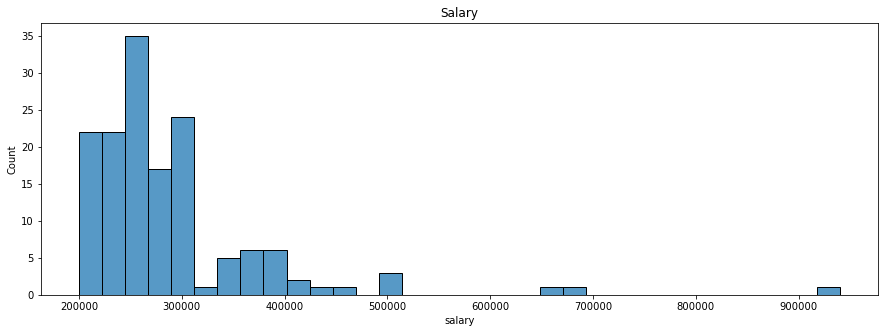

In [13]:
sns.histplot(data['salary'])
plt.title('Salary')
plt.show()

In [14]:
#The highest count of number of salary betweek 200,000 and 300,000 is 35.

In [15]:
#NaN in salary is someone with Not Placed status. Not place status is again unemployee so the salary is 0
data_select['salary'] = data_select['salary'].fillna(value=0)
data_select['salary'].isna().sum()

0

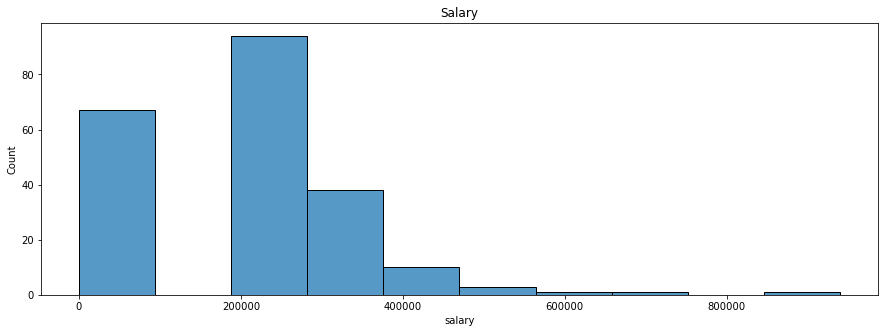

In [16]:
sns.histplot(data_select['salary'])
plt.title('Salary')
plt.show()

In [17]:
#The number of umployee is around 65 because the salary is 0

In [18]:
#Removing Outliers
q3 = data_select['salary'].quantile(0.99)
data_select = data_select[data_select['salary'] < q3].reset_index(drop=True)
data_select.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


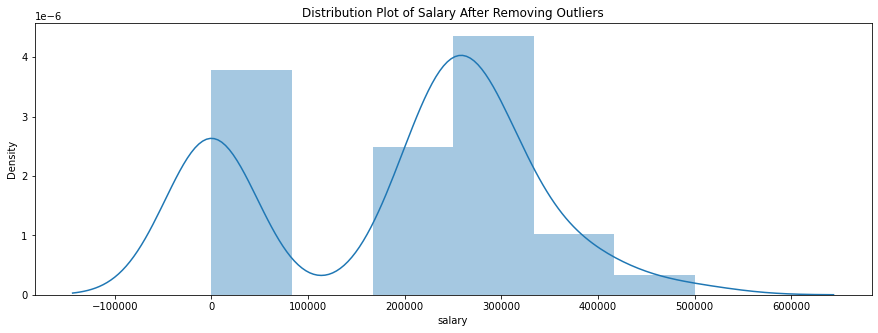

In [19]:
#Plot the distribution after removing the outliers from salary
sns.distplot(data_select['salary'])
plt.title('Distribution Plot of Salary After Removing Outliers')
plt.show()

In [20]:
#Get Numeric dan Object columns
numeric_cols = [i for i in data_select.columns if data_select[i].dtypes != 'object']
object_cols = [i for i in data_select.columns if data_select[i].dtypes == 'object']

print(numeric_cols, 'len :', len(numeric_cols))
print(object_cols, 'len :', len(object_cols))

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'] len : 6
['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'] len : 8


In [21]:
#Printing out each object and their unique and the count
for i in object_cols:
    print(data_select[i].unique(), 'len :', len(data_select[i].unique()))

['M' 'F'] len : 2
['Others' 'Central'] len : 2
['Others' 'Central'] len : 2
['Commerce' 'Science' 'Arts'] len : 3
['Sci&Tech' 'Comm&Mgmt' 'Others'] len : 3
['No' 'Yes'] len : 2
['Mkt&HR' 'Mkt&Fin'] len : 2
['Placed' 'Not Placed'] len : 2


In [22]:
#Labeling for object columns using map
data_select['gender'] = data_select['gender'].map({'M':0, 'F':1})
data_select['ssc_b'] = data_select['ssc_b'].map({'Central':0, 'Others':1})
data_select['hsc_b'] = data_select['hsc_b'].map({'Central':0, 'Others':1})
data_select['hsc_s'] = data_select['hsc_s'].map({'Commerce':0, 'Science':1, 'Arts':2})
data_select['degree_t'] = data_select['degree_t'].map({'Sci&Tech':0, 'Comm&Mgmt':1, 'Others':2})
data_select['workex'] = data_select['workex'].map({'No':0, 'Yes':1})
data_select['specialisation'] = data_select['specialisation'].map({'Mkt&HR':0, 'Mkt&Fin':1})
data_select['status'] = data_select['status'].map({'Not Placed':0, 'Placed':1})
data_select.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,1,91.00,1,0,58.00,0,0,55.0,0,58.80,1,270000.0
1,0,79.33,0,78.33,1,1,77.48,0,1,86.5,1,66.28,1,200000.0
2,0,65.00,0,68.00,0,2,64.00,1,0,75.0,1,57.80,1,250000.0
3,0,56.00,0,52.00,0,1,52.00,0,0,66.0,0,59.43,0,0.0
4,0,85.80,0,73.60,0,0,73.30,1,0,96.8,1,55.50,1,425000.0


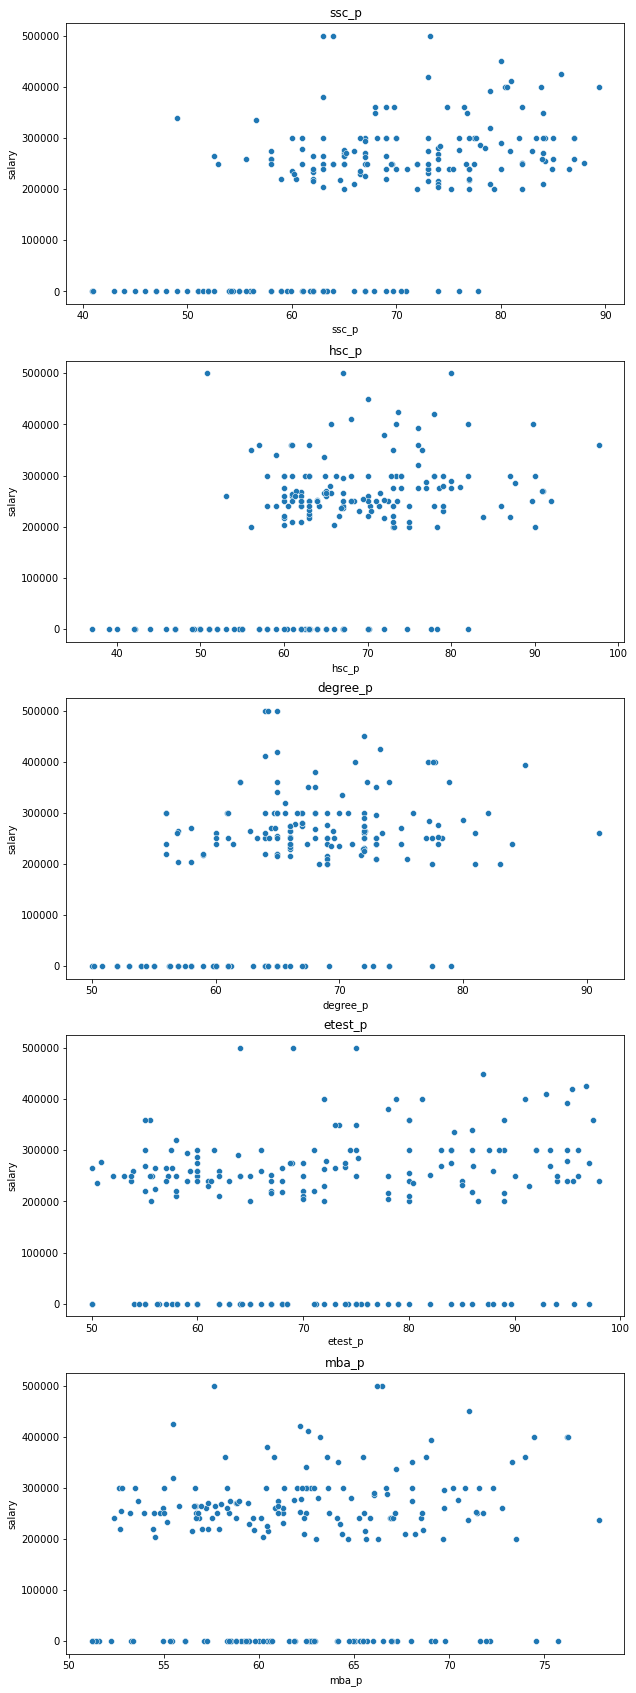

In [23]:
#Plotting numeric columns

ax = []
fig, (ax) = plt.subplots(5, 1, figsize = (10,30))
j = 0

for i in numeric_cols[0:-1]:
    sns.scatterplot(data=data_select, x=i, y='salary', ax=ax[j])
    ax[j].set_title(i)
    j += 1
    
plt.show()

In [24]:
#Which factor influenced a candidate in getting placed?

data_status_placed = data_select[data_select['status'] == 1]
data_status_not_placed = data_select[data_select['status'] == 0]

In [25]:
#Describing data_status placed
data_status_placed.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.0,145.000000
mean,0.324138,71.792966,0.482759,69.828069,0.620690,0.510345,68.772414,0.758621,0.420690,73.183241,0.634483,62.519310,1.0,278903.448276
std,0.469674,8.757456,0.501435,9.102250,0.486897,0.578759,6.458982,0.503817,0.495381,13.711792,0.483244,5.902777,0.0,62040.233825
min,0.000000,49.000000,0.000000,50.830000,0.000000,0.000000,56.000000,0.000000,0.000000,50.000000,0.000000,52.380000,1.0,200000.000000
25%,0.000000,65.000000,0.000000,63.000000,0.000000,0.000000,65.000000,0.000000,0.000000,60.000000,0.000000,57.690000,1.0,240000.000000
50%,0.000000,73.000000,0.000000,68.000000,1.000000,0.000000,68.000000,1.000000,0.000000,72.000000,1.000000,62.210000,1.0,264000.000000
75%,1.000000,78.500000,1.000000,75.000000,1.000000,1.000000,72.230000,1.000000,1.000000,85.000000,1.000000,66.720000,1.0,300000.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.0,500000.000000


In [26]:
#Describing data_status_not_placed
data_status_not_placed.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0,67.0
mean,0.417910,57.544030,0.432836,58.395522,0.597015,0.567164,61.134179,0.820896,0.149254,69.587910,0.373134,61.612836,0.0,0.0
std,0.496938,8.394246,0.499208,9.914090,0.494200,0.633027,6.365825,0.575388,0.359028,11.930687,0.487288,5.705689,0.0,0.0
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.0,0.0
25%,0.000000,52.000000,0.000000,51.000000,0.000000,0.000000,57.000000,0.000000,0.000000,60.000000,0.000000,58.480000,0.0,0.0
50%,0.000000,56.280000,0.000000,60.330000,1.000000,0.000000,61.000000,1.000000,0.000000,67.000000,0.000000,60.690000,0.0,0.0
75%,1.000000,63.000000,1.000000,64.000000,1.000000,1.000000,65.000000,1.000000,0.000000,76.500000,1.000000,65.405000,0.0,0.0
max,1.000000,77.800000,1.000000,82.000000,1.000000,2.000000,79.000000,2.000000,1.000000,97.000000,1.000000,75.710000,0.0,0.0


In [27]:
#1. ssc_p, hsc_p, degree_p, workex and specialization has a reasonable clear difference for the status 
#of 'Not Placed' and 'Placed' (88%)
#2. gender, ssc_p, hsc_p, degree_p, workex and specialization (87%)
#3. ssc_p, hsc_p, degree_p, degree_t, workex, etest_p, mba_p (90%)
#4. ssc_p, hsc_p, degree_p, etest_p, specialization, mba_p (87%)
#5. ssc_p, hsc_p, degree_p, etest_p, specialization, (83%)
#6. all (89%)

In [28]:
#Creating Models
import statsmodels.api as sm

X = data_select[['ssc_p', 'hsc_p', 'degree_p', 'degree_t', 'workex', 'etest_p', 'mba_p']]
y = data_select['status']

X_const = sm.add_constant(X)
reg_status = sm.Logit(y, X_const) #Logistic Regression for categorical data 0:Not Placed and 1:Placed
result_status = reg_status.fit()

result_status.summary()

Optimization terminated successfully.
         Current function value: 0.257902
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  212
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            7
Date:                Sun, 17 Apr 2022   Pseudo R-squ.:                  0.5866
Time:                        15:17:53   Log-Likelihood:                -54.675
converged:                       True   LL-Null:                       -132.26
Covariance Type:            nonrobust   LLR p-value:                 3.343e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.2949      4.177     -3.901      0.000     -24.482      -8.108
ssc_p          0.2032      0.039      5.181      0.000       0.126       0.280
hsc_p          0.1099      0.034      3.216      0.001       0.043       0.177
degree_p       0.1670      0.049      3.389      0.001       0.070       0.264
degree_t       0.7225      0.486      1.485      0.137      -0.231       1.676
workex         2.2178      0.660      3.358      0.001       0.923       3.512
etest_p       -0.0139      0.020     -0.693      0.489      -0.053       0.026
mba_p         -0.2278      0.050     -4.563      0.000      -0.326      -0.130
==============================================================================
"""

In [29]:
#Creating actual and predict table
table_pred_status = pd.DataFrame()
table_pred_status['actual'] = y
table_pred_status['predict'] = np.round(result_status.predict(X_const))
table_pred_status

,actual,predict
0,1,1.0
1,1,1.0
2,1,1.0
3,0,0.0
4,1,1.0
...,...,...
207,1,1.0
208,1,1.0
209,1,1.0
210,1,1.0


In [30]:
#Printing consufion_matrix and accurary score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm_status = confusion_matrix(table_pred_status['actual'], table_pred_status['predict'])
acc_status = accuracy_score(table_pred_status['actual'], table_pred_status['predict'])

print(cm_status)
print(np.round(acc_status,2))

[[ 55  12]
 [  9 136]]
0.9


<AxesSubplot:>

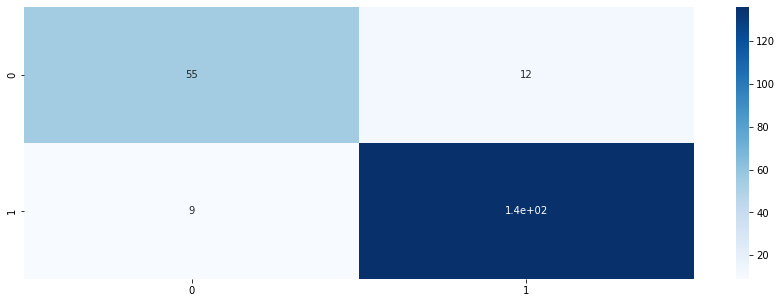

In [31]:
#Printing heatmap of confustion matrix
sns.heatmap(cm_status, cmap="Blues", annot=True)

In [32]:
#Which factor influenced a candidate in getting placed? 
#ssc_p, hsc_p, degree_p, degree_t, workex, etest_p, mba_p (90%)